In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [0]:
class NLM:
    def __init__(self, p, alfa):
        self.p = p # Nova dimensão
        self.alfa = alfa # Taxa de aprendizagem, entre 0.3 e 0.4

    def d(self, pi, pj):
        return np.linalg.norm(pi-pj)

    def c(self, data):
        # Data é uma matriz N x D
        l,c = data.shape
        soma = 0 
        for i in range(l):
            for j in range(i+1,l):
                soma += self.d(data[i,:], data[j,:])
        return soma

    def transform(self, data):
        pca = PCA(n_components = self.p)
        return pca.fit_transform(data)

    def stress(self, data_y, data_x):
        l,_ = data_y.shape
        c = self.c(data_y)
        soma = 0
        for i in range(l):
            for j in range(i+1,l):
                dy = self.d(data_y[i,:], data_y[j,:])
                dx = self.d(data_x[i,:], data_x[j,:])
                soma += (dy - dx )**2 /dy
        return soma/c

    def derivate_1(self, i, data_y, data_x):
        l,_ = data_y.shape
        c = self.c(data_y)
        soma = 0
        for j in range(l):
            if j != i:
                dy = self.d(data_y[i,:], data_y[j,:])
                dx = self.d(data_x[i,:], data_x[j,:])
                soma += ( dy - dx )/(dy*dx)*(data_x[i,:] - data_x[j,:])
        return -2*soma/c

    def derivate_2(self, i, data_y, data_x):
        l,_ = data_y.shape
        c = self.c(data_y)
        soma = 0
        for j in range(l):
            if j != i:
                dy = self.d(data_y[i,:], data_y[j,:])
                dx = self.d(data_x[i,:], data_x[j,:])
                soma += ( ( dy - dx )/(dy*dx) - (data_x[i,:] - data_x[j,:])**2 / dx**3 )
        return np.linalg.norm((-2)*soma/c)

    def run(self, data, i_max = 200, show=False):
        stress = np.zeros(i_max)  
        data_y = data
        data_x = self.transform(data)

        for repeat in range(i_max):
            stress[repeat] = self.stress(data_y, data_x)

            delta_x = np.zeros(data_x.shape)

            for i in range(data_y.shape[0]):
                delta_x[i,:] = self.derivate_1(i,data_y, data_x)/self.derivate_2(i, data_y, data_x)
            
            data_x -= delta_x
        if show:
            plt.plot(np.arange(i_max), stress)
            plt.xlabel('Iter')
            plt.ylabel('Stress')
            plt.grid()
            plt.show()

        return data_x

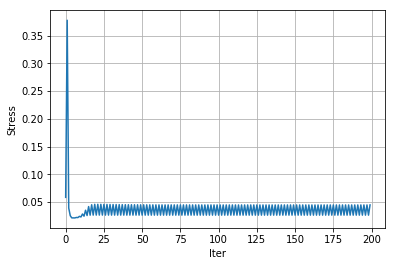

array([[-0.14982828, -0.30909619,  0.04946192, -0.36352987],
       [ 0.67930821,  0.08223441,  0.2132487 , -0.03528329],
       [ 0.44718972, -0.00864299,  0.05308907, -0.74818591],
       [-0.21217553,  0.43581571,  0.37643711,  0.33828282],
       [ 0.28661114, -0.04732272, -0.44194785,  0.13821825],
       [-0.38984036,  0.56526311,  0.60207074, -0.42435266],
       [ 0.23618879,  0.26102045,  0.46806342, -0.92177461],
       [ 0.80423573,  0.39380432,  0.04800918, -0.29390174],
       [-0.19825998,  0.6392417 ,  0.48752671,  0.11312237],
       [ 0.50731214,  0.13617977, -0.24282414, -0.25772609],
       [ 0.39937846, -0.56291621,  0.33078528,  0.15761455],
       [ 0.55903896,  0.04833232,  0.55246146,  0.17798309],
       [ 0.32637937,  0.53472352,  0.1130221 , -0.36025339],
       [-0.3843094 , -0.4937338 ,  0.55986295, -0.18307798],
       [-0.62482016, -0.29544546,  0.60103988,  0.18344233],
       [ 0.5888315 ,  0.45453934, -0.33893107, -0.35702096],
       [ 0.10943774, -0.